In [ ]:
import pandas as pd
import numpy as np
import os
import platform
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install wandb
import wandb
# wandb.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.system("curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")
os.system("unzip bank-additional.zip")
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
if platform == "linux" or platform == "linux2" or "darwin":
    os.system("rm -rf ./bank-additional ./__MACOSX bank-additional.zip")
elif platform == "win32":
    os.system("del bank-additional.zip")
    os.system("del bank-additional/*")
    os.system("del bank-additional")
    os.system("./__MACOSX/*")
    os.system("./__MACOSX")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
pd.crosstab(
  df['pdays'],       # The row labels for the table
  df['poutcome'],    # The column labels for the table
  values=df['age'],  # The values to use for the cells of the table
  aggfunc='count',   # The aggregation function to use (in this case, 'count')
  normalize=True     # Whether to normalize the values (i.e. convert to proportions)
)


poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


In [ ]:
"""
This code is modifying a dataframe named "df" by creating a new column called "pdays2" based on the values in the existing "pdays" column.
The new "pdays2" column contains the value 0 if the corresponding value in the "pdays" column is 999, and 1 otherwise.

The code also replaces all occurrences of the value 999 in the "pdays" column with the value 30. 
Finally, the code changes the data type of the "pdays" column from its original type to integer.
"""

#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
df['pdays2']=df.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
df['pdays']=df.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
df['pdays']=df['pdays'].astype(int)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
# Create Binning for all numeric fields base on Box plot quantile
def binning(dataframe,featureName):
    print (featureName)
    q1 = dataframe[featureName].quantile(0.25)
    q2 = dataframe[featureName].quantile(0.50)
    q3 = dataframe[featureName].quantile(0.75)
    dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
    dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <= q2), featureName] = 2
    dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <= q3), featureName] = 3
    dataframe.loc[(dataframe[featureName] > q3), featureName] = 4 
    print (q1, q2, q3)
'''
 the function uses the calculated quartile values to create four bins for the feature's values. 
 The first bin contains all values that are less than or equal to q1, the second bin contains all values that are greater than q1 but 
 less than or equal to q2, and so on. 
 The function then replaces the original values in the dataframe with the bin numbers. 
 Finally, the function prints the calculated quartile values.
'''

"\n the function uses the calculated quartile values to create four bins for the feature's values. \n The first bin contains all values that are less than or equal to q1, the second bin contains all values that are greater than q1 but \n less than or equal to q2, and so on. \n The function then replaces the original values in the dataframe with the bin numbers. \n Finally, the function prints the calculated quartile values.\n"

In [ ]:
binning(df,'age')
binning(df,'campaign')

age
32.0 38.0 47.0
campaign
1.0 2.0 3.0


In [ ]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [ ]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
df[df.columns[idx_numeric]] = scaler.fit_transform(df[df.columns[idx_numeric]])

In [ ]:
nominal = ['job','marital','education','contact','month','day_of_week']
df_clean = pd.get_dummies(df,columns=nominal)
df_clean['y']=df_clean['y'].map({'yes': 1,'no': 0})
df_clean.head()
'''
This code creates a list called "nominal" that contains the names of several columns in a dataframe called "df".
 Next, the code uses the get_dummies method from the Pandas library to create new columns for each unique value in the nominal columns of "df".
 This process is known as one-hot encoding, and it is commonly used to convert categorical data into a numerical form that can be used by
  machine learning algorithms.

After one-hot encoding the nominal columns, the code maps the values in the "y" column to 1 if they are "yes" and 0 if they are "no".
 Finally, the code displays the first few rows of the resulting dataframe using the head method.
'''

'\nThis code creates a list called "nominal" that contains the names of several columns in a dataframe called "df".\n Next, the code uses the get_dummies method from the Pandas library to create new columns for each unique value in the nominal columns of "df".\n This process is known as one-hot encoding, and it is commonly used to convert categorical data into a numerical form that can be used by\n  machine learning algorithms.\n\nAfter one-hot encoding the nominal columns, the code maps the values in the "y" column to 1 if they are "yes" and 0 if they are "no".\n Finally, the code displays the first few rows of the resulting dataframe using the head method.\n'

In [ ]:
df_clean.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.000000,1,1,1,0.053070,0.0,1.0,0,0.5,0.9375,...,0,1,0,0,0,0,1,0,0,0
1,1.000000,0,1,1,0.030297,0.0,1.0,0,0.5,0.9375,...,0,1,0,0,0,0,1,0,0,0
2,0.333333,1,-1,1,0.045954,0.0,1.0,0,0.5,0.9375,...,0,1,0,0,0,0,1,0,0,0
3,0.666667,1,1,1,0.030704,0.0,1.0,0,0.5,0.9375,...,0,1,0,0,0,0,1,0,0,0
4,1.000000,1,1,-1,0.062424,0.0,1.0,0,0.5,0.9375,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
df_clean.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays2',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
    

In [ ]:
df_with_dummies=pd.get_dummies(df_clean)

In [ ]:
df_with_dummies.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays2',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
    

In [ ]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown']
df_clean = dropfeature(df_with_dummies, features_dropped)

In [ ]:
df_clean.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.484753,0.791128,-0.071720,0.672575,0.052518,0.357361,0.970592,0.172963,0.465051,0.725393,...,0.013256,0.334296,0.099568,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485
std,0.375652,0.406686,0.985314,0.723616,0.052720,0.379227,0.152465,0.494901,0.181443,0.327283,...,0.114372,0.471750,0.299427,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,-1.000000,1.000000,0.020740,0.000000,1.000000,0.000000,0.500000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,1.000000,-1.000000,1.000000,0.036600,0.333333,1.000000,0.000000,0.500000,0.937500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,1.000000,0.064864,0.666667,1.000000,0.000000,0.500000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_clean.corr()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,-0.192301,0.003540,0.005661,-0.004660,0.006369,-0.002497,-0.010802,0.014831,0.057812,...,-0.022421,-0.041590,0.029363,0.014131,0.008312,0.011121,0.024550,-0.024733,0.016108,-0.026730
default,-0.192301,1.000000,-0.015815,-0.003782,0.011794,-0.034102,-0.078862,0.102416,-0.023417,-0.203263,...,0.051178,-0.066952,0.085652,0.060199,0.054710,-0.003981,-0.007028,0.005004,-0.003641,0.009592
housing,0.003540,-0.015815,1.000000,0.044296,0.007658,0.009485,0.011722,-0.021314,0.011783,0.060196,...,-0.013108,0.022383,-0.032332,-0.003108,-0.006986,0.015536,-0.011706,-0.011844,0.010433,-0.001710
loan,0.005661,-0.003782,0.044296,1.000000,0.000916,-0.012855,0.000470,0.001327,0.001511,-0.001849,...,0.004334,-0.001684,0.006138,0.008996,0.001905,-0.007376,-0.005742,0.002671,0.008350,0.002046
duration,-0.004660,0.011794,0.007658,0.000916,1.000000,-0.035614,-0.044696,0.020640,0.033360,-0.027968,...,-0.005516,0.008054,-0.015941,0.015454,0.018011,-0.010343,-0.023068,0.014666,0.004140,0.014537
campaign,0.006369,-0.034102,0.009485,-0.012855,-0.035614,1.000000,0.058549,-0.080920,0.029377,0.142827,...,-0.015368,-0.003914,-0.082864,-0.064370,-0.040936,0.037849,0.048341,-0.029720,-0.029016,-0.027143
pdays,-0.002497,-0.078862,0.011722,0.000470,-0.044696,0.058549,1.000000,-0.582184,-0.486198,0.269936,...,-0.074458,0.070615,-0.019889,-0.125917,-0.153222,0.013914,0.001907,-0.008055,-0.007931,0.000496
previous,-0.010802,0.102416,-0.021314,0.001327,0.020640,-0.080920,-0.582184,1.000000,-0.313110,-0.420489,...,0.072733,-0.012534,0.081050,0.127754,0.157651,0.004404,-0.002012,0.001512,0.000090,-0.003929
poutcome,0.014831,-0.023417,0.011783,0.001511,0.033360,0.029377,-0.486198,-0.313110,1.000000,0.192972,...,0.012381,-0.083190,-0.086552,0.009298,0.029118,-0.023005,-0.000145,0.008180,0.008670,0.005808
emp.var.rate,0.057812,-0.203263,0.060196,-0.001849,-0.027968,0.142827,0.269936,-0.420489,0.192972,1.000000,...,-0.138849,-0.111356,-0.105917,-0.213706,-0.170366,-0.015277,-0.018139,-0.007673,0.014582,0.026797


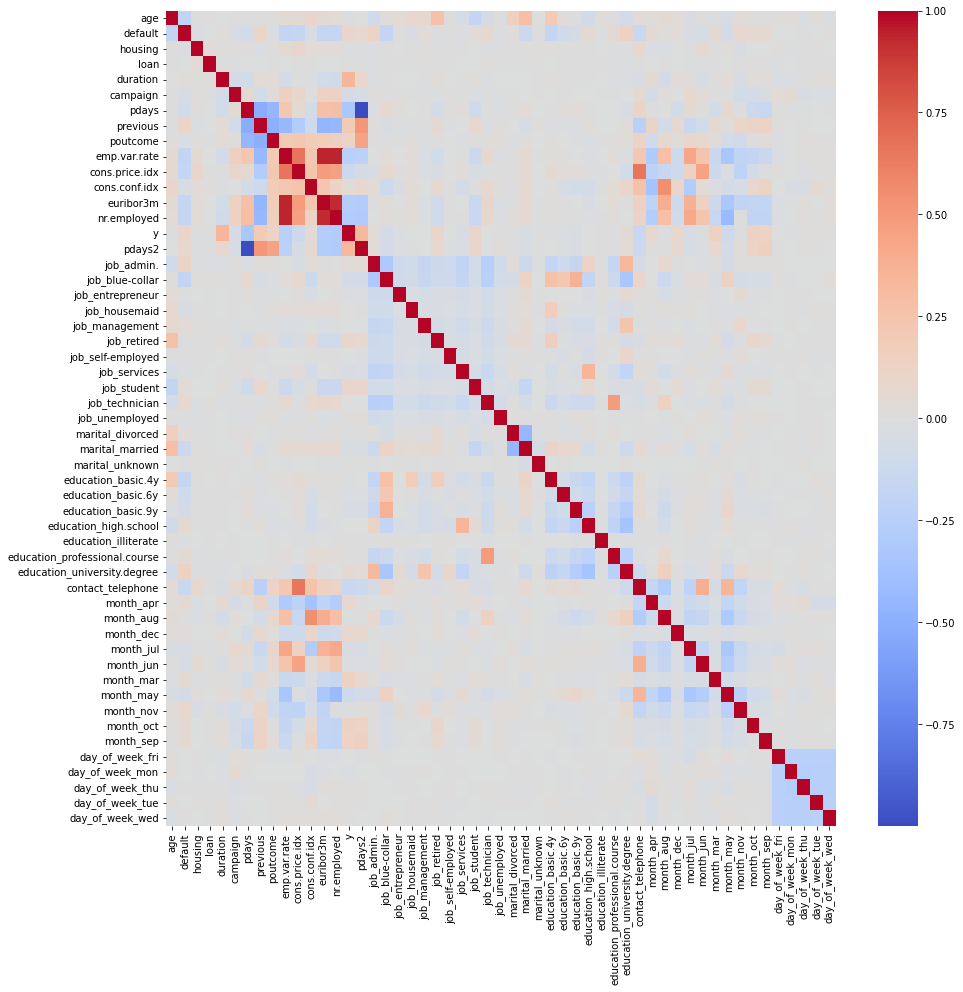

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_clean.corr(method='spearman'), annot=False, cmap='coolwarm')
plt.show()

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for col in df_clean.columns:
  remove_outlier(df_clean,col)

In [ ]:
x = df_clean.values
df = pd.DataFrame(scaler.fit_transform(x), columns=df_clean.columns, index = df_clean.index)
df

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.000000,1.0,1.0,1.0,0.053070,0.000000,1.0,0.000000,0.5,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.000000,0.5,1.0,1.0,0.030297,0.000000,1.0,0.000000,0.5,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.333333,1.0,0.0,1.0,0.045954,0.000000,1.0,0.000000,0.5,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.666667,1.0,1.0,1.0,0.030704,0.000000,1.0,0.000000,0.5,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.000000,1.0,1.0,0.0,0.062424,0.000000,1.0,0.000000,0.5,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.000000,1.0,0.0,1.0,0.067914,0.000000,1.0,0.000000,0.5,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,0.666667,1.0,1.0,1.0,0.077877,0.000000,1.0,0.000000,0.5,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,1.000000,1.0,0.0,1.0,0.038430,0.333333,1.0,0.000000,0.5,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,0.666667,1.0,1.0,1.0,0.089874,0.000000,1.0,0.000000,0.5,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays2',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
tf.config.get_visible_devices()
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### KNN:

In [ ]:
%%timeit -n 2 -r 3
neigh = KNeighborsClassifier(n_neighbors=3)

y=df[['y']]
X = df.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
if len(gpus) >0:
  with tf.device('/GPU:0'):
    neigh.fit(X_train, y_train)
else:
  neigh.fit(X_train,y_train)

22.2 ms ± 3.55 ms per loop (mean ± std. dev. of 3 runs, 2 loops each)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

y=df[['y']]
X = df.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
if len(gpus) >0:
  with tf.device('/GPU:0'):
    neigh.fit(X_train, y_train)
else:
  neigh.fit(X_train,y_train)

In [ ]:
%%timeit -n 1 -r 1
if len(gpus) >0:
  with tf.device('/GPU:0'):
    print(neigh.score(X_test, y_test))
else:
  print(neigh.score(X_test, y_test))


0.8862992635753014
5.33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


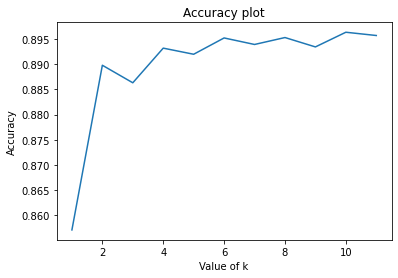

1min 19s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1
x_axis = range(1,12)
acc = []
if len(gpus) >0:
  with tf.device('/GPU:0'):
    for i in range(1,12):
      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(X_train, y_train)
      acc.append(neigh.score(X_test, y_test))
    plt.plot(x_axis, acc)
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy')
    plt.title("Accuracy plot")
    plt.show()
else:
  for i in range(1,12):
      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(X_train, y_train)
      acc.append(neigh.score(X_test, y_test))
  plt.plot(x_axis, acc)
  plt.xlabel('Value of k')
  plt.ylabel('Accuracy')
  plt.title("Accuracy plot")
  plt.show()

### MLP:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
%%timeit -n 1 -r 1
model = MLPClassifier(hidden_layer_sizes=(10,8),random_state=5,verbose=True,learning_rate_init=0.01)
if len(gpus) >0:
  with tf.device('/GPU:0'): 
    model.fit(X_train,y_train)
else:
  model.fit(X_train,y_train)

Iteration 1, loss = 0.32142627
Iteration 2, loss = 0.23574089
Iteration 3, loss = 0.20209151
Iteration 4, loss = 0.19627690
Iteration 5, loss = 0.19266083
Iteration 6, loss = 0.18904441
Iteration 7, loss = 0.18768394
Iteration 8, loss = 0.18710687
Iteration 9, loss = 0.18512022
Iteration 10, loss = 0.18495719
Iteration 11, loss = 0.18504266
Iteration 12, loss = 0.18583648
Iteration 13, loss = 0.18302742
Iteration 14, loss = 0.18409430
Iteration 15, loss = 0.18474105
Iteration 16, loss = 0.18206237
Iteration 17, loss = 0.18247364
Iteration 18, loss = 0.18441506
Iteration 19, loss = 0.18253946
Iteration 20, loss = 0.18152499
Iteration 21, loss = 0.17977956
Iteration 22, loss = 0.18009420
Iteration 23, loss = 0.18013901
Iteration 24, loss = 0.17930748
Iteration 25, loss = 0.18019765
Iteration 26, loss = 0.17999154
Iteration 27, loss = 0.17946833
Iteration 28, loss = 0.17922455
Iteration 29, loss = 0.17952526
Iteration 30, loss = 0.17886627
Iteration 31, loss = 0.17805036
Iteration 32, los

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10,8),random_state=5,verbose=True,learning_rate_init=0.01)
if len(gpus) >0:
  with tf.device('/GPU:0'):
    model.fit(X_train,y_train)
else:
  model.fit(X_train,y_train)

Iteration 1, loss = 0.32142627
Iteration 2, loss = 0.23574089
Iteration 3, loss = 0.20209151
Iteration 4, loss = 0.19627690
Iteration 5, loss = 0.19266083
Iteration 6, loss = 0.18904441
Iteration 7, loss = 0.18768394
Iteration 8, loss = 0.18710687
Iteration 9, loss = 0.18512022
Iteration 10, loss = 0.18495719
Iteration 11, loss = 0.18504266
Iteration 12, loss = 0.18583648
Iteration 13, loss = 0.18302742
Iteration 14, loss = 0.18409430
Iteration 15, loss = 0.18474105
Iteration 16, loss = 0.18206237
Iteration 17, loss = 0.18247364
Iteration 18, loss = 0.18441506
Iteration 19, loss = 0.18253946
Iteration 20, loss = 0.18152499
Iteration 21, loss = 0.17977956
Iteration 22, loss = 0.18009420
Iteration 23, loss = 0.18013901
Iteration 24, loss = 0.17930748
Iteration 25, loss = 0.18019765
Iteration 26, loss = 0.17999154
Iteration 27, loss = 0.17946833
Iteration 28, loss = 0.17922455
Iteration 29, loss = 0.17952526
Iteration 30, loss = 0.17886627
Iteration 31, loss = 0.17805036
Iteration 32, los

In [ ]:
%%timeit -n 1 -r 1
if len(gpus) >0:
  with tf.device('/GPU:0'):
    ypred=model.predict(X_test)
    print(accuracy_score(y_test,ypred))
else:
  ypred=model.predict(X_test)
  print(accuracy_score(y_test,ypred))

0.9145423646516144
17 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### SVM:

In [ ]:
from sklearn import svm

In [ ]:
%%timeit -n 1 -r 1
clf = svm.SVC()
if len(gpus) >0:
  with tf.device('/GPU:0'):
    clf.fit(X_train,y_train)
else:
  clf.fit(X_train,y_train)

17.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
clf = svm.SVC()
if len(gpus) >0:
  with tf.device('/GPU:0'):
    clf.fit(X_train,y_train)
else:
  clf.fit(X_train,y_train)

In [ ]:
%%timeit -n 1 -r 1
if len(gpus) >0:
  with tf.device('/GPU:0'):
    print(clf.score(X_test, y_test))
else:
  print(clf.score(X_test, y_test))

0.9002994254268836
7.78 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
idx =  random.randint(0,X_test.shape[0])
print("Index:",idx)
print("Predicted value:",clf.predict(X_test.iloc[[idx]].values.tolist()))
print("Actual value:",y_test.iloc[[idx]].values.tolist()[0])

Index: 524
Predicted value: [0.]
Actual value: [0.0]


In [ ]:
%%timeit -n 1 -r 1
if len(gpus) >0:
  with tf.device('/GPU:0'):
    predicted_values = clf.predict(X_test)
    actual_values = y_test.values.tolist()
    correct, err = 0,0
    for idx, val in enumerate(predicted_values):
        if val == actual_values[idx]:
            correct += 1
        else:
            err += 1
    acc = correct/(correct+err)
    print("Accuracy is:", acc)
else:
  predicted_values = clf.predict(X_test)
  actual_values = y_test.values.tolist()
  correct, err = 0,0
  for idx, val in enumerate(predicted_values):
      if val == actual_values[idx]:
          correct += 1
      else:
          err += 1
  acc = correct/(correct+err)
  print("Accuracy is:", acc)

Accuracy is: 0.9002994254268836
10.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1

if len(gpus) >0:
  with tf.device('/GPU:0'):
    clf = svm.SVC(kernel ='linear', random_state = 0)
    clf.fit(X_train, y_train)
    linear_acc = clf.score(X_test, y_test)

    clf = svm.SVC(kernel ='poly', random_state = 0)
    clf.fit(X_train, y_train)
    poly_acc = clf.score(X_test, y_test)

    clf = svm.SVC(kernel ='rbf', random_state = 0)
    clf.fit(X_train, y_train)
    rbf_acc = clf.score(X_test, y_test)

    clf = svm.SVC(kernel ='sigmoid', random_state = 0)
    clf.fit(X_train, y_train)
    sigmoid_acc = clf.score(X_test, y_test)

    print(linear_acc)
    print(poly_acc)
    print(rbf_acc)
    print(sigmoid_acc)
else:
  clf = svm.SVC(kernel ='linear', random_state = 0)
  clf.fit(X_train, y_train)
  linear_acc = clf.score(X_test, y_test)

  clf = svm.SVC(kernel ='poly', random_state = 0)
  clf.fit(X_train, y_train)
  poly_acc = clf.score(X_test, y_test)

  clf = svm.SVC(kernel ='rbf', random_state = 0)
  clf.fit(X_train, y_train)
  rbf_acc = clf.score(X_test, y_test)

  clf = svm.SVC(kernel ='sigmoid', random_state = 0)
  clf.fit(X_train, y_train)
  sigmoid_acc = clf.score(X_test, y_test)

  print(linear_acc)
  print(poly_acc)
  print(rbf_acc)
  print(sigmoid_acc)

0.9012705349194788
0.9037792344420167
0.9002994254268836
0.8425184106174638
1min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Decision Tree:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
import platform
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%timeit -n 1 -r 1
X = df[df.columns.drop('y')]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

model = DecisionTreeClassifier(max_depth=5, random_state=42)


if len(gpus) >0:
  with tf.device('/GPU:0'):
    model.fit(X_train,y_train)
else:
  model.fit(X_train,y_train)

model.get_depth()

84.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
X = df[df.columns.drop('y')]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

model = DecisionTreeClassifier(max_depth=5, random_state=42)
if len(gpus) >0:
  with tf.device('/GPU:0'):
    model.fit(X_train,y_train)
else:
  model.fit(X_train,y_train)
model.get_depth()

5

In [ ]:
%%timeit -n 1 -r 1
print(model.score(X_train, y_train))

0.9173805972737679
11.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1
print(model.score(X_test, y_test))

0.9159181030994578
7.26 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


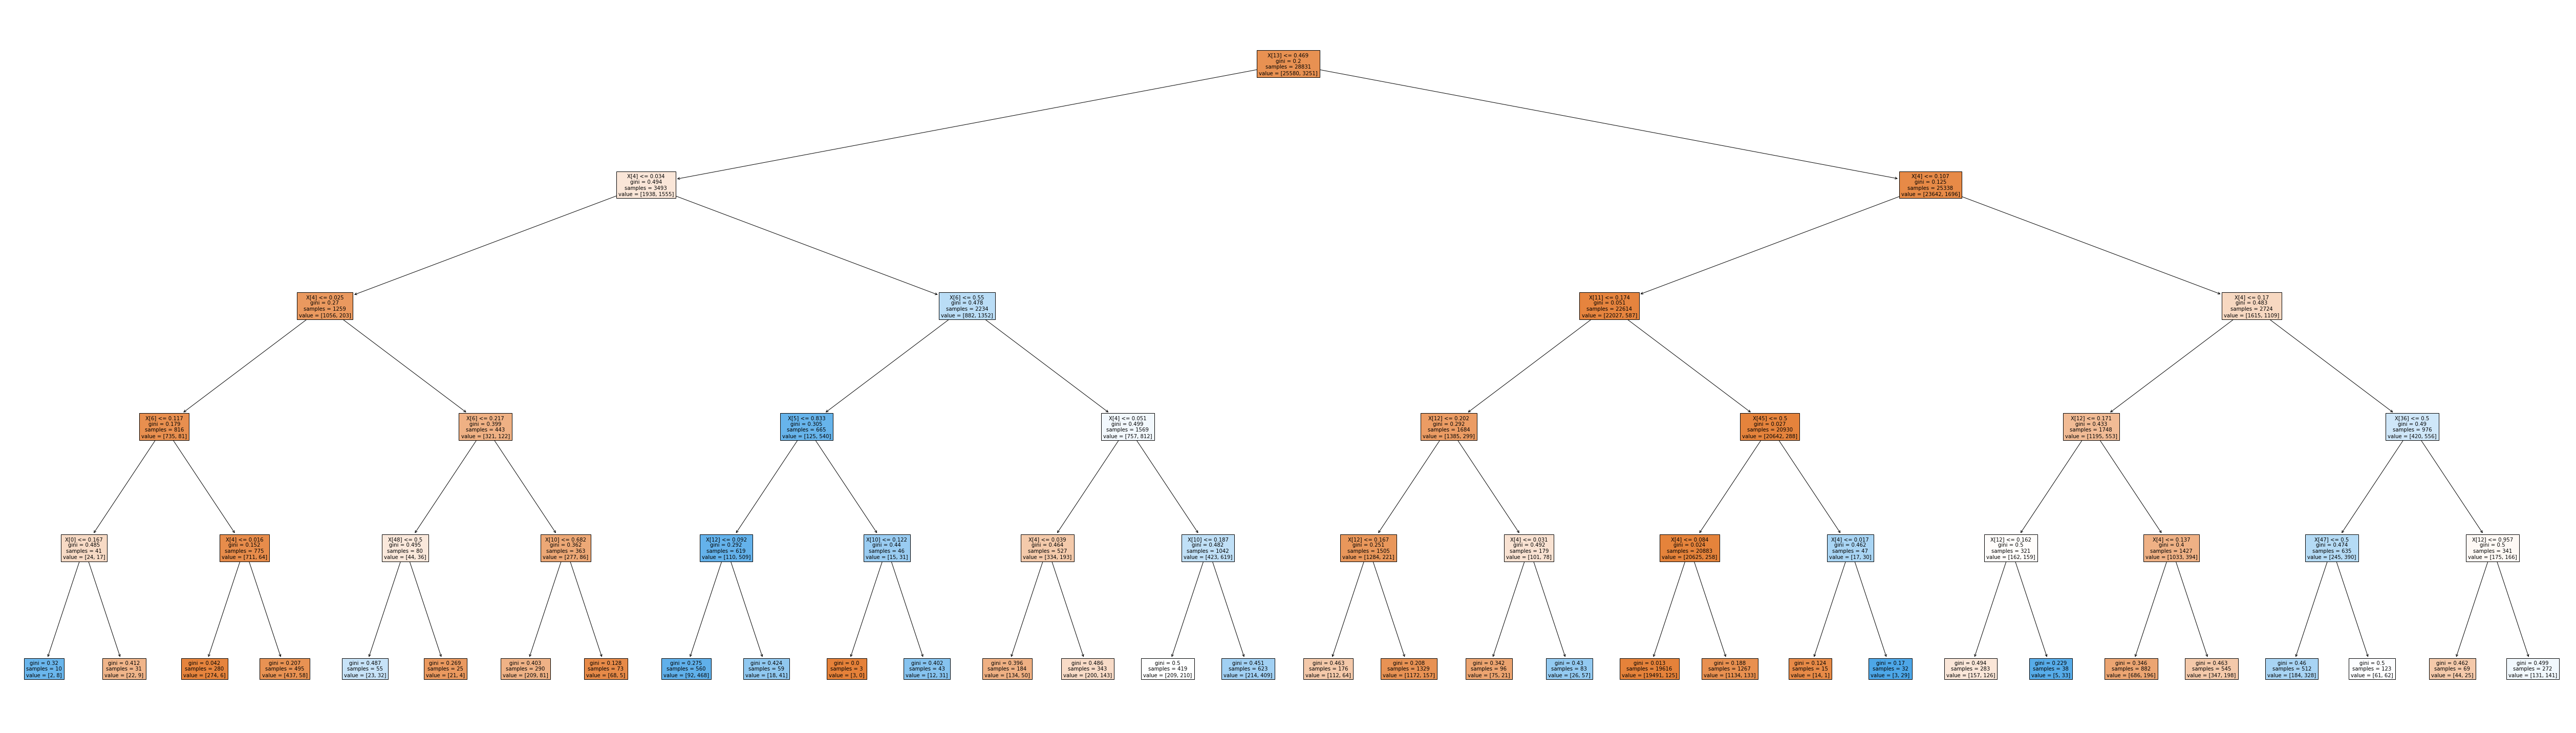

2.48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1
if len(gpus) >0:
  with tf.device('/GPU:0'):
    plt.figure(figsize=(70,20))
    tree.plot_tree(model, filled=True)
    plt.tight_layout()
    plt.show()
else:
  plt.figure(figsize=(70,20))
  tree.plot_tree(model, filled=True)
  plt.tight_layout()
  plt.show()

### Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
%%timeit -n 1 -r 1
X = df[df.columns.drop('y')]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

model = GaussianNB()
if len(gpus) >0:
  with tf.device('/GPU:0'):
    model.fit(X_train,y_train)
else:
  model.fit(X_train,y_train)

56.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
X = df[df.columns.drop('y')]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

model = GaussianNB()
if len(gpus) >0:
  with tf.device('/GPU:0'):
    model.fit(X_train,y_train)
else:
  model.fit(X_train,y_train)

In [ ]:
%%timeit -n 1 -r 1
print(model.score(X_train, y_train))

0.8703132045367833
26.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1
print(model.score(X_test, y_test))

0.8744031722910092
14.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
tf.keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(12, input_dim=52, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
if len(gpus)>0:
  with tf.device('/gpu:0'):
    model.fit(X_train,y_train, epochs=100, batch_size=10)
else:
  model.fit(X_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
2884/2884 [==============================] - 9s 3ms/step - loss: 0.2714 - accuracy: 0.8958
Epoch 2/100
2884/2884 [==============================] - 8s 3ms/step - loss: 0.2149 - accuracy: 0.9075
Epoch 3/100
2884/2884 [==============================] - 8s 3ms/step - loss: 0.2001 - accuracy: 0.9105
Epoch 4/100
2884/2884 [==============================] - 8s 3ms/step - loss: 0.1933 - accuracy: 0.9104
Epoch 5/100
2884/2884 [==============================] - 8s 3ms/step - loss: 0.1912 - accuracy: 0.9114
Epoch 6/100
2884/2884 [==============================] - 15s 5ms/step - loss: 0.1891 - accuracy: 0.9109
Epoch 7/100
2884/2884 [==============================] - 14s 5ms/step - loss: 0.1871 - accuracy: 0.9126
Epoch 8/100
2884/2884 [==============================] - 11s 4ms/step - loss: 0.1868 - accuracy: 0.9111
Epoch 9/100
2884/2884 [==============================] - 10s 3ms/step - loss: 0.1849 - accuracy: 0.9131
Epoch 10/100
2884/2884 [==============================] - 9s 3ms/step

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)
print("Model accuracy: %.2f"% (accuracy[1]*100))

387/387 [==============================] - 1s 2ms/step - loss: 0.1888 - accuracy: 0.9117
[0.18876156210899353, 0.9117099642753601]
Model accuracy: 91.17


#### Model Evaluation Metrics:

In [ ]:
y_pred = model.predict(X_test)
y_test = y_test[['y']].to_numpy()
print(type(y_test))
print(type(y_pred))

387/387 [==============================] - 1s 1ms/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred.round()))
print('Recall: %.3f' % recall_score(y_test, y_pred.round()))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred.round()))
print('F1 Score: %.3f' % f1_score(y_test, y_pred.round()))

Precision: 0.642
Recall: 0.485
Accuracy: 0.912
F1 Score: 0.553


### Random Forest:

In [ ]:
%%timeit -n 1 -r 1 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
X = df[df.columns.drop('y')]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

rf_model = RandomForestClassifier(max_depth=5, random_state=42)
params = {
    'max_depth': range(6,11)
    }
# this will train 100 models over 5 folds of cross validation (500 models total)
model = RandomizedSearchCV(rf_model, params,  n_iter=100, cv=5, random_state=1)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.9107388524722829
29.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
X = df[df.columns.drop('y')]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

rf_model = RandomForestClassifier(max_depth=2, random_state=42)
params = {
    'bootstrap': [True, False],
    'max_depth': range(4,12),
    'min_samples_leaf': range(1,5),
    'criterion': ["gini", "entropy", "log_loss"]
    }
# this will train 100 models over 5 folds of cross validation (500 models total)
model = RandomizedSearchCV(rf_model, params,  n_iter=100, cv=5, random_state=1)
if len(gpus) >0:
  with tf.device('/GPU:0'):
    model.fit(X_train,y_train)
else:
  model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.best_estimator_.get_params())

0.9114671845917294
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
if len(gpus) >0:
  with tf.device('/GPU:0'):
    logreg.fit(X_train,y_train)
else:
  logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred.round())
cnf_matrix

array([[10710,   258],
       [  849,   540]])

In [ ]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred.round()))
print('Recall: %.3f' % recall_score(y_test, y_pred.round()))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred.round()))
print('F1 Score: %.3f' % f1_score(y_test, y_pred.round()))

Precision: 0.677
Recall: 0.389
Accuracy: 0.910
F1 Score: 0.494


### Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
if len(gpus) >0:
  with tf.device('/GPU:0'):
    reg.fit(X_train,y_train)
else:
  reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred.round())
print(cnf_matrix)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred.round(), average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred.round(), average='micro' ))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred.round() ))
print('F1 Score: %.3f' % f1_score(y_test, y_pred.round(), average='micro'))

[[10755   212     1]
 [  921   467     1]
 [    0     0     0]]
Precision: 0.908
Recall: 0.908
Accuracy: 0.908
F1 Score: 0.908


### LSTM (Long Short-Term Memory):

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) that can process time series, text, or speech as sequential data. They have a more complex structure than other types of RNNs, such as Gated Recurrent Units, and are designed to capture long-term dependencies in sequential data (GRUs).

In [ ]:
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam
#Initializing the LSTM classifier Network
classifier = Sequential()

#Adding the input LSTM network layer
classifier.add(CuDNNLSTM(128, input_shape=(52,1), return_sequences=True))
classifier.add(Dropout(0.2))
#Adding a second LSTM network layer
classifier.add(CuDNNLSTM(128))

#Adding a dense hidden layer
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))

#Adding the output layer
classifier.add(Dense(10, activation='softmax'))

In [ ]:
#Compiling the network
classifier.compile( loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.003),
              metrics=['accuracy'] )

#Fitting the data to the model
if len(gpus) >0:
  with tf.device('/GPU:0'):
    classifier.fit(X_train,
            y_train,
              epochs=10,
              batch_size=10,
              validation_data=(X_test, y_test))
else:
  classifier.fit(X_train,
            y_train,
              epochs=10,
              batch_size=10,
              validation_data=(X_test, y_test))

Epoch 1/10
2884/2884 [==============================] - 23s 7ms/step - loss: 0.3670 - accuracy: 0.8868 - val_loss: 0.3550 - val_accuracy: 0.8876
Epoch 2/10
2884/2884 [==============================] - 24s 8ms/step - loss: 0.3556 - accuracy: 0.8872 - val_loss: 0.3548 - val_accuracy: 0.8876
Epoch 3/10
2884/2884 [==============================] - 21s 7ms/step - loss: 0.3540 - accuracy: 0.8872 - val_loss: 0.3517 - val_accuracy: 0.8876
Epoch 4/10
2884/2884 [==============================] - 21s 7ms/step - loss: 0.3529 - accuracy: 0.8872 - val_loss: 0.3515 - val_accuracy: 0.8876
Epoch 5/10
2884/2884 [==============================] - 22s 8ms/step - loss: 0.3529 - accuracy: 0.8872 - val_loss: 0.3518 - val_accuracy: 0.8876
Epoch 6/10
2884/2884 [==============================] - 22s 8ms/step - loss: 0.3527 - accuracy: 0.8872 - val_loss: 0.3518 - val_accuracy: 0.8876
Epoch 7/10
2884/2884 [==============================] - 21s 7ms/step - loss: 0.3525 - accuracy: 0.8872 - val_loss: 0.3516 - val_ac

In [ ]:
# Checking The Accuracy On Test Set
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

387/387 [==============================] - 2s 5ms/step - loss: 0.3515 - accuracy: 0.8876
Test Loss: 0.3515377640724182
Test Accuracy: 0.8875941038131714


### GRU (Gated Recurrent Units):

GRUs are a type of recurrent neural network (RNN) that can process sequential data like time series, text, or speech. They have a simpler structure than other types of RNNs, such as Long Short-Term Memory (LSTM) networks, and are designed to capture long-term dependencies in sequential data.

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.utils import to_categorical

# define the model
model = Sequential()
model.add(GRU(units=32, input_shape=(None, 52)))
model.add(Dense(2, activation='softmax'))


# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summarize the model
model.summary()

# fit the model on the training data
y=df[['y']]
X = df.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# reshape the input data to a 3D tensor with shape (batch_size, 1, input_dim)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# one-hot encode the target data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.fit(X_train, y_train, epochs=10, batch_size=32)


# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 32)                8256      
                                                                 
 dense_12 (Dense)            (None, 2)                 66        
                                                                 
Total params: 8,322
Trainable params: 8,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
901/901 [==============================] - 5s 3ms/step - loss: 0.2760 - accuracy: 0.8967
Epoch 2/10
901/901 [==============================] - 3s 3ms/step - loss: 0.2296 - accuracy: 0.9051
Epoch 3/10
901/901 [==============================] - 3s 3ms/step - loss: 0.2136 - accuracy: 0.9096
Epoch 4/10
901/901 [==============================] - 3s 3ms/step - loss: 0.2100 - accuracy: 0.9097
Epoch 5/10
901/901 [============================

### XGBoost:

XGBoost (eXtreme Gradient Boosting) is used to train gradient boosting models such as decision trees. Because of its ability to achieve state-of-the-art results on a variety of tasks, it is widely used in machine learning competitions and has been successful in a number of real-world applications. Gradient boosting is a technique for constructing ensembles of weak models like decision trees. It works by training weak models sequentially and adding them to the ensemble, with each new model attempting to correct the errors of the previous models. XGBoost is an efficient gradient boosting implementation that is intended to make it easier to tune the model's hyperparameters and achieve better results.

In [ ]:
import xgboost as xgb

# define the model
model = xgb.XGBClassifier()

# fit the model on the training data
X = df.drop(['y'], axis=1)
y = df[['y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model.fit(X_train, y_train)

# evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.9181840252488468


### AdaBoost:

AdaBoost (Adaptive Boosting) is a supervised learning algorithm for training classifiers. It is an ensemble method, which means that it combines the predictions of several smaller models to create a more powerful model.
AdaBoost works by weighting training data points based on misclassification rate, then training a series of weak models on the weighted data. The final model is a combination of all of the weak models, with each model being assigned a weight based on its performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# define the model
model = AdaBoostClassifier()

# fit the model on the training data
X = df.drop(['y'], axis=1)
y = df[['y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model.fit(X_train, y_train)

# evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.9099295945617868
